<a href="https://colab.research.google.com/github/kebabee/Machine-Learning/blob/main/housing_single_hidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California housing data



In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

housing = fetch_california_housing()
X = housing.data
Y = housing.target
print(X.shape, Y.shape)
print(housing.feature_names)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Median Income, House Age, Average Rooms, Average Bedrooms, Population, Average Occupants (average number of household members), Latitude, Longitude

### 5 neurons in hidden layer

In [4]:
regr = MLPRegressor(hidden_layer_sizes=(5,), random_state=42, max_iter=500)
regr.fit(X_train_scale, Y_train)

MLPRegressor(hidden_layer_sizes=(5,), max_iter=500, random_state=42)

In [5]:
Y_train_pred = regr.predict(X_train_scale)
Y_test_pred = regr.predict(X_test_scale)

rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print(rmse_train, rmse_test, r2_score(Y_train, Y_train_pred), r2_score(Y_test, Y_test_pred))

0.5992800290381756 0.6095455897248284 0.7313417064725702 0.7164657506759806


Compared to results of LinearRegression():

0.7196757085831575, 0.7455813830127749, 0.6125511913966952, 0.5757877060324524

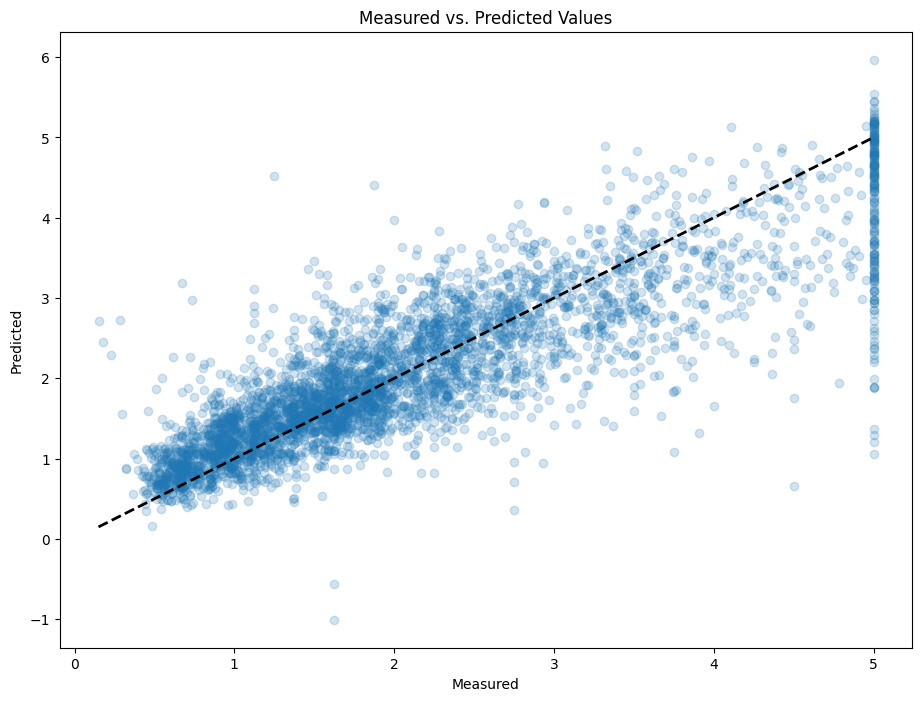

In [7]:
plt.figure(figsize=(11, 8))
plt.scatter(Y_test, Y_test_pred, alpha=0.2)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # I am also adding a black reference line
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs. Predicted Values')
plt.show()

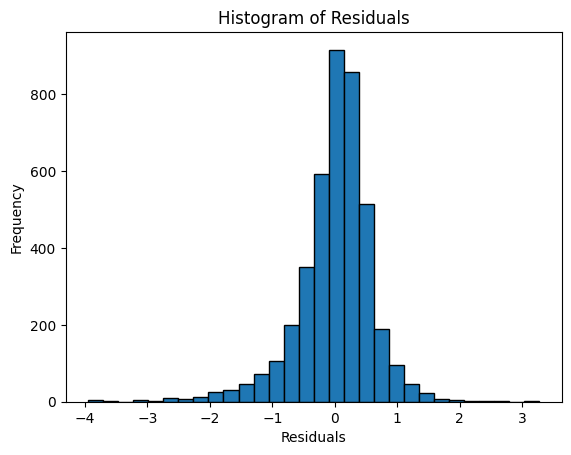

In [8]:
residuals = Y_test_pred - Y_test
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

### 10 neurons in hidden layer:

In [9]:
regr2 = MLPRegressor(hidden_layer_sizes=(10,), random_state=42, max_iter=500)
regr2.fit(X_train_scale, Y_train)
Y_train_pred2 = regr2.predict(X_train_scale)
Y_test_pred2 = regr2.predict(X_test_scale)

rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred2))
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred2))
print(rmse_train, rmse_test, r2_score(Y_train, Y_train_pred2), r2_score(Y_test, Y_test_pred2))

0.5706393445821787 0.5866496729952773 0.7564074139499273 0.7373660860539393


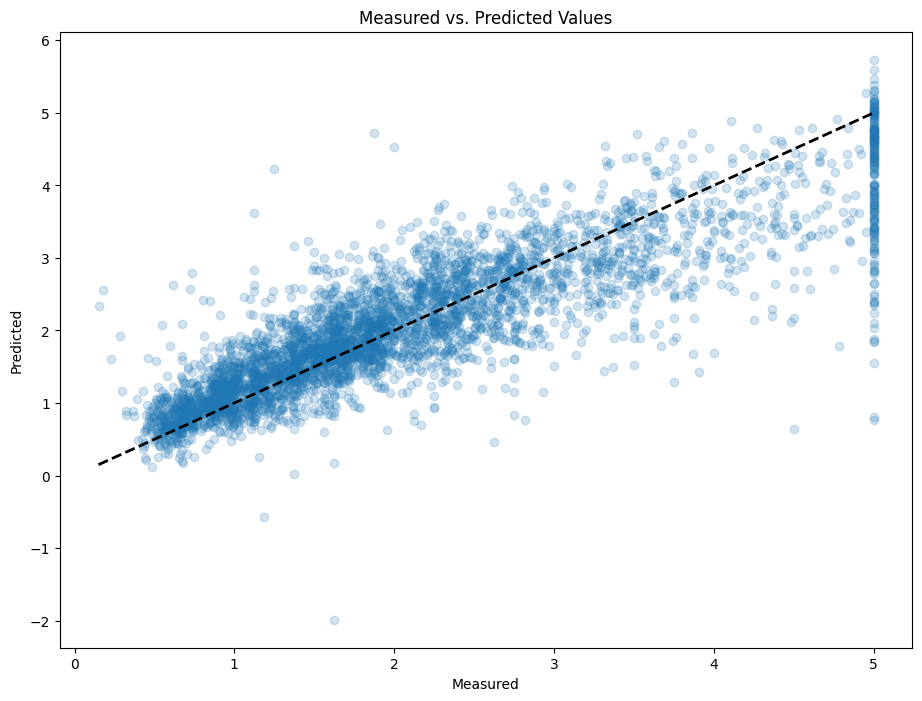

In [10]:
plt.figure(figsize=(11, 8))
plt.scatter(Y_test, Y_test_pred2, alpha=0.2)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # I am also adding a black reference line
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs. Predicted Values')
plt.show()

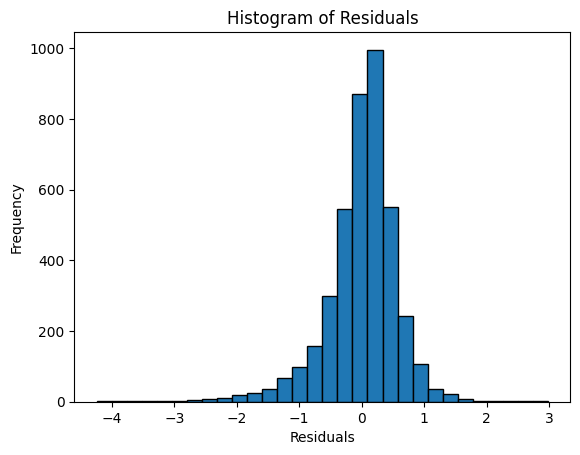

In [11]:
residuals2 = Y_test_pred2 - Y_test
plt.hist(residuals2, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

### 50 neurons in hidden layer:

In [12]:
regr3 = MLPRegressor(hidden_layer_sizes=(50,), random_state=42, max_iter=500)
regr3.fit(X_train_scale, Y_train)
Y_train_pred3 = regr3.predict(X_train_scale)
Y_test_pred3 = regr3.predict(X_test_scale)

rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred3))
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred3))
print(rmse_train, rmse_test, r2_score(Y_train, Y_train_pred3), r2_score(Y_test, Y_test_pred3))

0.5289904764590385 0.5478725848220436 0.7906676502381231 0.7709384061130826


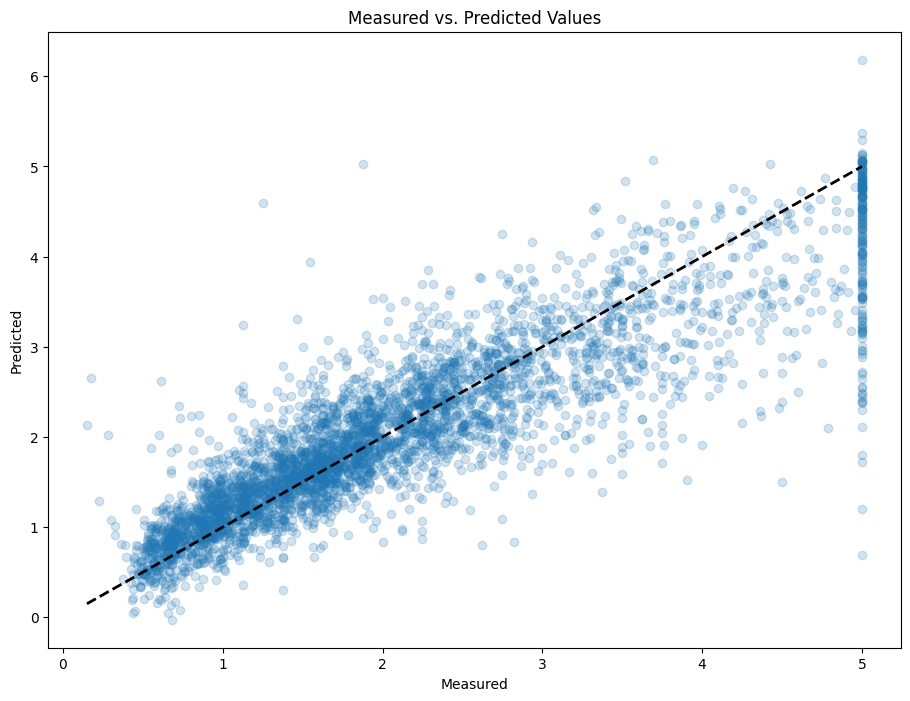

In [13]:
plt.figure(figsize=(11, 8))
plt.scatter(Y_test, Y_test_pred3, alpha=0.2)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # I am also adding a black reference line
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs. Predicted Values')
plt.show()

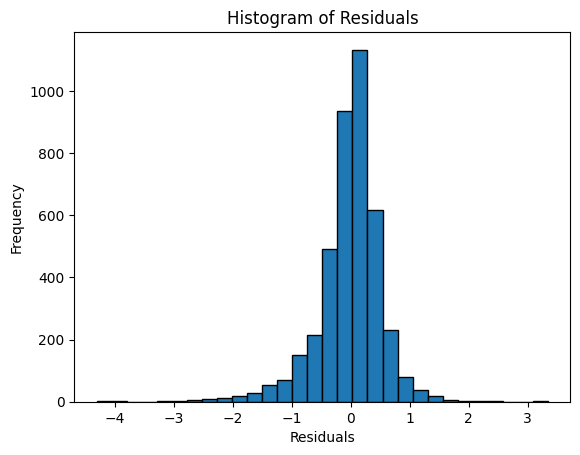

In [14]:
residuals3 = Y_test_pred3 - Y_test
plt.hist(residuals3, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

### Results:

5 Units:
* Train RMSE 0.599
* Test RMSE 0.610
* Train R2 0.731
* Test R2 0.716

10 Units:
* Train RMSE 0.571
* Test RMSE 0.587
* Train R2 0.756
* Test R2 0.737

50 Units:
* Train RMSE 0.529
* Test RMSE 0.548
* Train R2 0.791
* Test R2 0.771